# Principles of data mining

## What is it?

[Merriam-Webster](https://www.merriam-webster.com/dictionary/data%20mining):

>**Data mining**
>
>*"the practice of searching through large amounts of computerized data to find useful patterns or trends"*
>
>**First known use: 1968**

(another word from the same year is "error bar", coincidence?)

## Differences vs. statistical modeling

- Focus on emprirical/exploratory research for a priori unknown relationships in the data
- Usually automated through machine learning
- Complex relationships and large numbers of variables are easier to model

### Terminology

- *Variable* (also *feature*)
    * "table column"
    * Can be continuous (e.g. temperature) or categorical (e.g. species).
- *Sample*
    * "table row"
    * A single measurement of one or more variables
- *Model*
    * A predictor for a variable given the other variables

## Types of data mining

- Classification
    * Prediction of categorical variables (species)
    
- Regression
    * Prediction of continuous variables (temperature, moisture, etc.)

- Clustering
    * Used to find related subgroups of data when the categories are not known beforehand.

- Anomaly detection
    * Automated detection of outliers from the data


[Flowchart for machine learning](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

# Example: Looking at the data

### Show, don't tell

This lecture note material is in a Jupyter notebook, which lets us not only write text, but also runs (here, [Python](https://python.org)) code and shows the results:

In [1]:
# Code here
print('Result here')

Result here


#### Doing it yourself
If you are familiar with Jupyter notebooks and want to run this notebook yourself, take a look at the [readme](./README.md) for instructions.

First we'll have to read the data. [This](./Windermere_NBAS_data_1945_2013.txt) is a dataset from lake Windermere which looks like this:
```
sdate,variable,value,sign_if_LT_LOD
02-Jan-47,TEMP,5.6,
08-Jan-47,TEMP,5.1,
13-Jan-47,TEMP,4.95,
20-Jan-47,TEMP,5.1,
27-Jan-47,TEMP,4.6,
03-Feb-47,TEMP,4,
10-Feb-47,TEMP,3.4,
18-Feb-47,TEMP,2.8,
24-Feb-47,TEMP,1.6,
...
```

We'll use a library called [Pandas](https://pandas.pydata.org) which has a lot of useful tooling for manipulating tabular data (Similar to R). It has a function `read_csv` to easily read .csv format.
We'll also remove the last column for this example, since it is not needed.

In [2]:
import pandas as pd
data = pd.read_csv('Windermere_NBAS_data_1945_2013.txt', parse_dates=True, index_col=0)
data = data.drop(columns='sign_if_LT_LOD')

The data has multiple variables that have been measured at certain dates. Let's see what's there:

In [3]:
data.groupby('variable').describe()

value                                                           \
           count          mean          std      min       25%        50%   
variable                                                                    
ALKA      1804.0  10132.061530  2007.322631  6100.00  8600.000  10000.000   
NH4N      1546.0      9.319599     8.372265     0.00     5.000      5.000   
NO3N      2736.0    323.472953   145.980099     8.00   220.000    300.000   
OXYG      3242.0     97.804226    10.454674    61.00    90.400     98.000   
PH         987.0      7.245064     0.422140     6.38     7.000      7.170   
PO4P      2511.0      2.170315     2.905830     0.10     0.600      1.000   
SECC       772.0      4.423316     1.092187     1.60     3.600      4.300   
SIO2      2771.0   1062.488271   656.177240   -44.00   440.000   1100.000   
TEMP      5472.0     10.825303     4.990691     0.60     6.215     10.300   
TOCA      1860.0      5.564737     4.477227     0.29     1.650      4.735   
TOTP      1577.0     13.410219     4.420519     3.30    11.000     13.000   

                              
               75%       max  
variable                      
ALKA      11500.00  17000.00  
NH4N         12.00    125.00  
NO3N        417.00   1196.00  
OXYG        105.00    134.30  
PH            7.37      9.66  
PO4P          3.00     66.30  
SECC          5.10      9.60  
SIO2       1680.00   2700.00  
TEMP         15.30     23.70  
TOCA          8.06     28.76  
TOTP         15.20     55.00

It would be nicer if each measured variable was a column by itself. We can use `pivot_table` to do just that:

In [4]:
data = data.pivot_table(index='sdate', columns='variable', values='value')
data.head()

variable,ALKA,NH4N,NO3N,OXYG,PH,PO4P,SECC,SIO2,TEMP,TOCA,TOTP
sdate,,,,,,,,,,,
1968-01-02,9600.0,1.0,320.0,NaN,NaN,3.6,NaN,1680.0,5.70,0.75,NaN
1968-01-09,9800.0,3.0,340.0,NaN,NaN,3.4,NaN,1750.0,5.20,0.80,NaN
1968-01-16,9700.0,1.0,350.0,NaN,NaN,3.3,NaN,1720.0,4.95,0.80,NaN
1968-01-23,8500.0,7.0,360.0,NaN,NaN,2.9,NaN,1760.0,4.70,0.96,NaN
1968-01-30,NaN,NaN,330.0,NaN,NaN,3.0,NaN,1770.0,5.45,0.49,NaN


Now we can easily study the correlations of different variables:

In [5]:
data.corr()

variable,ALKA,NH4N,NO3N,OXYG,PH,PO4P,SECC,SIO2,TEMP,TOCA,TOTP
variable,,,,,,,,,,,
ALKA,1.000000,0.206367,0.005054,0.201926,0.417583,-0.074682,-0.271770,-0.400939,0.455592,0.320383,-0.202437
NH4N,0.206367,1.000000,-0.049884,0.014153,0.007311,-0.099261,-0.025426,-0.108779,0.158552,0.021559,-0.151990
NO3N,0.005054,-0.049884,1.000000,-0.189748,-0.402358,0.348183,0.252787,0.355121,-0.520163,-0.437774,0.003584
OXYG,0.201926,0.014153,-0.189748,1.000000,0.454290,-0.115428,-0.249327,-0.303016,0.268855,0.310691,0.105338
PH,0.417583,0.007311,-0.402358,0.454290,1.000000,-0.439783,-0.344579,-0.535502,0.583771,0.562226,0.013258
PO4P,-0.074682,-0.099261,0.348183,-0.115428,-0.439783,1.000000,0.287969,0.394254,-0.395955,-0.348194,0.201379
SECC,-0.271770,-0.025426,0.252787,-0.249327,-0.344579,0.287969,1.000000,0.147791,-0.185314,-0.591275,-0.165457
SIO2,-0.400939,-0.108779,0.355121,-0.303016,-0.535502,0.394254,0.147791,1.000000,-0.849555,-0.601620,0.023580
TEMP,0.455592,0.158552,-0.520163,0.268855,0.583771,-0.395955,-0.185314,-0.849555,1.000000,0.569124,-0.055489


The same, but in color:

<IPython.core.display.Javascript object>


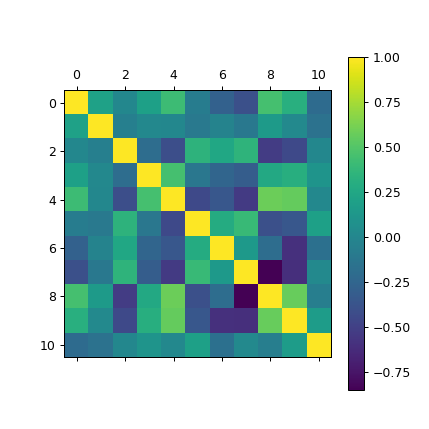

In [6]:
%matplotlib notebook

import matplotlib.pyplot as plt
plt.matshow(data.corr())
plt.colorbar()

Let's try something a bit more involved and try to determine a temperature trend. For this we'll fit a line to our temperature data:

In [57]:
import numpy as np

# Our target to fit
y = data['TEMP'].values[~np.isnan(data['TEMP'].values)]
# We don't need the actual dates, a numbering will be enough
X = np.arange(0, len(y))

model = np.polyfit(X, y, 1)
model

array([-2.64966253e-04,  1.11876447e+01])

In [62]:
monthly = data.resample('1M').mean()
monthly.head()

variable,ALKA,NH4N,NO3N,OXYG,PH,PO4P,SECC,SIO2,TEMP,TOCA,TOTP
sdate,,,,,,,,,,,
1968-01-31,9400.000000,3.0,340.0,NaN,NaN,3.240,NaN,1736.00,5.2000,0.760,NaN
1968-02-29,9400.000000,2.0,357.5,NaN,NaN,3.275,NaN,1770.00,4.1875,0.690,NaN
1968-03-31,9333.333333,NaN,367.5,NaN,NaN,2.550,NaN,1770.00,4.5375,1.070,NaN
1968-04-30,11266.666667,3.0,368.0,NaN,NaN,1.350,NaN,1472.00,7.3200,4.132,NaN
1968-05-31,9200.000000,NaN,315.0,NaN,NaN,0.225,NaN,243.75,10.2000,9.390,NaN


<IPython.core.display.Javascript object>


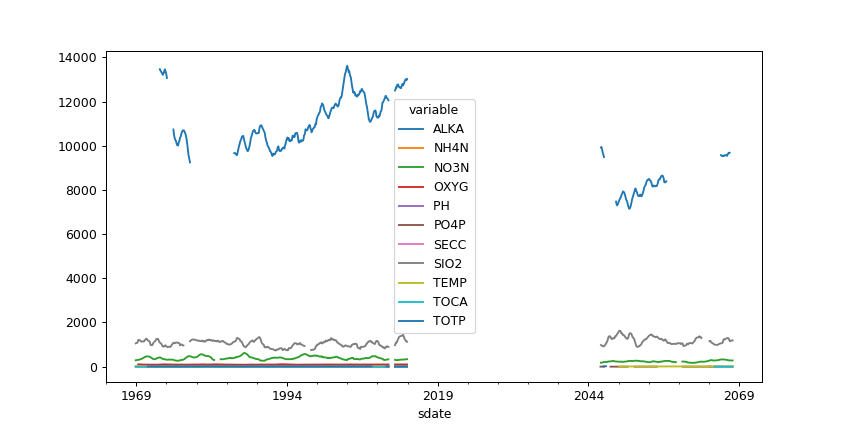

In [65]:
%matplotlib notebook
monthly.rolling(window=12).mean().plot()

Lesson 1: **Really** look at your data!

Peering at the statistics won't help you:
[The datasaur dozen](https://dabblingwithdata.wordpress.com/2017/05/03/the-datasaurus-a-monstrous-anscombe-for-the-21st-century/)


### [Continue after the break...](./02-Outro.ipynb)